In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [2]:
import astropy.coordinates as coord
import astropy.units as u

In [3]:
#need distance
par=1.355666609658345 #parallax from gaia
dis=1/par
dis

0.7376444863918423

In [4]:
c1 = coord.SkyCoord(ra=2.5734659781564035*u.degree, dec=-17.594383578542697*u.degree,
                    distance=(dis*u.mas).to(u.pc, u.parallax()),
                    pm_ra_cosdec=34.310*u.mas/u.yr,
                    pm_dec=-54.969*u.mas/u.yr,
                    radial_velocity=191.76546*u.km/u.s,
                    frame='icrs')

In [5]:
gc1 = c1.transform_to(coord.Galactocentric)

In [6]:
print(gc1.v_x, gc1.v_y, gc1.v_z)

2.1558753063374807 km / s -129.46477728436983 km / s -274.30316336670006 km / s


In [7]:
#https://arxiv.org/pdf/2012.13808.pdf

In [8]:
v_sun = [11.1, 244, 7.25] * (u.km / u.s)  # [vx, vy, vz]
gc_frame = coord.Galactocentric(
    galcen_distance=8*u.kpc,
    galcen_v_sun=v_sun,
    z_sun=0*u.pc)

In [9]:
gc2 = c1.transform_to(gc_frame)
print(gc2.v_x, gc2.v_y, gc2.v_z)

3.071818462855911 km / s -117.70477728436984 km / s -274.3307689980588 km / s


In [10]:
galcen_distance = 8*u.kpc
pm_gal_sgrA = [-6.379, -0.202] * u.mas/u.yr # from Reid & Brunthaler 2004
vy, vz = -(galcen_distance * pm_gal_sgrA).to(u.km/u.s, u.dimensionless_angles())

In [11]:
vx = 11.1 * u.km/u.s
v_sun2 = u.Quantity([vx, vy, vz])  # List of Quantity -> a single Quantity

gc_frame2 = coord.Galactocentric(galcen_distance=galcen_distance,
                                 galcen_v_sun=v_sun2,
                                 z_sun=0*u.pc)
gc3 = c1.transform_to(gc_frame2)
print(gc3.v_x, gc3.v_y, gc3.v_z)

3.071818462855911 km / s -119.78908859123138 km / s -273.9201687290489 km / s


## Plotting

Text(0, 0.5, 'V_r')

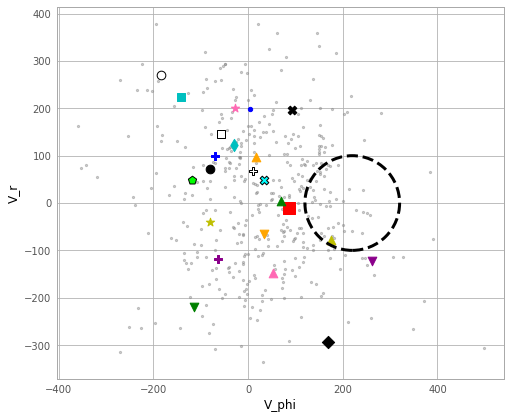

In [5]:
#Vr and Vphi
data = np.genfromtxt("toomre_diagram_data.csv", delimiter=",", names=["name","v_r", "v_phi"])
ufd = np.genfromtxt("ufdvphivr.csv", delimiter=",", names=["name","x", "y"])
size=75
figure, axes = plt.subplots(figsize=(8, 8))

plt.scatter(data['v_phi'], data['v_r'],color='grey',s=5,alpha=0.4)
plt.scatter(data['v_phi'][1], data['v_r'][1], s=150, color='red',marker='s')
plt.scatter(ufd['x'][1], ufd['y'][1], s=size, color='black',marker='X')
plt.scatter(ufd['x'][2], ufd['y'][2], s=size, color='black',marker='D')
plt.scatter(ufd['x'][3], ufd['y'][3],  s=size,color='orange', marker='^')
plt.scatter(ufd['x'][4], ufd['y'][4],  s=size,color='orange', marker='v')
plt.scatter(ufd['x'][5], ufd['y'][5],  s=size,color='white', marker='P', edgecolors='black') #carina i
plt.scatter(ufd['x'][6], ufd['y'][6],  s=size,color='white', edgecolors='black')
plt.scatter(ufd['x'][7], ufd['y'][7],  s=size,color='white',marker='s', edgecolors='black')
plt.scatter(ufd['x'][8], ufd['y'][8],  s=size,color='g',marker='v')
plt.scatter(ufd['x'][9], ufd['y'][9],  s=size,color='green', marker='^')
plt.scatter(ufd['x'][10], ufd['y'][10], s=size, color='black')
plt.scatter(ufd['x'][11], ufd['y'][11], s=size, color='y',marker='^')
plt.scatter(ufd['x'][12], ufd['y'][12], s=size, color='b',marker='.')
plt.scatter(ufd['x'][13], ufd['y'][13], s=size, color='hotpink', marker='*')
plt.scatter(ufd['x'][14], ufd['y'][14], s=size, color='y', marker='*')
plt.scatter(ufd['x'][15], ufd['y'][15], s=size, color='b',marker='P')
plt.scatter(ufd['x'][16], ufd['y'][16], s=size, color='hotpink', marker='^') #sculptor
plt.scatter(ufd['x'][17], ufd['y'][17], s=size, color='c',marker='s')
plt.scatter(ufd['x'][18], ufd['y'][18], s=size, color='c', marker='d')
plt.scatter(ufd['x'][19], ufd['y'][19], s=size, color='darkmagenta', marker='v')
plt.scatter(ufd['x'][20], ufd['y'][20], s=size, color='darkmagenta', marker='P')
plt.scatter(ufd['x'][21], ufd['y'][21], s=size, color='cyan', marker='X',edgecolors='black')
plt.scatter(-118.44, 49.429, s=size, color='lime',marker='p',edgecolors='black') #ursa major

circle=plt.Circle((220, 0), 100, fill=False, color='black',linestyle='dashed',linewidth='3')

axes.set_aspect(1)
axes.add_artist(circle)
plt.xlabel('V_phi')
plt.ylabel('V_r')

Text(0.5, 0, 'Z_max')

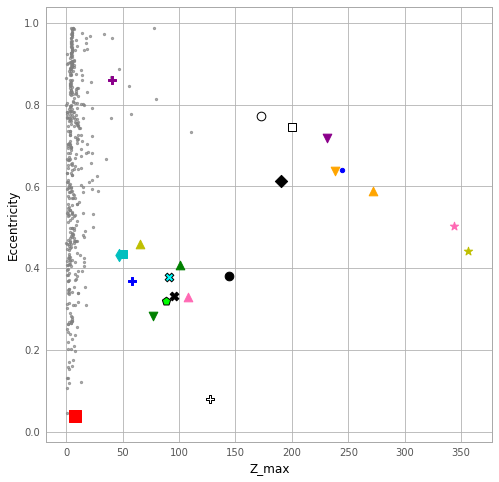

In [6]:
#Ecc vs Zmax
data = np.genfromtxt("eccvszmax.csv", delimiter=",", names=["y", "x"])
ufd = np.genfromtxt("ufdeccvszmax.csv", delimiter=",", names=["name","y", "x"])
size=75
figure, axes = plt.subplots(figsize=(8, 8))

plt.scatter(data['x'], data['y'],color='grey',s=5,alpha=0.4)
plt.scatter(data['x'][1], data['y'][1], s=150, color='red',marker='s')
plt.scatter(ufd['x'][1], ufd['y'][1], s=size, color='black',marker='X')
plt.scatter(ufd['x'][2], ufd['y'][2], s=size, color='black',marker='D')
plt.scatter(ufd['x'][3], ufd['y'][3],  s=size,color='orange', marker='^')
plt.scatter(ufd['x'][4], ufd['y'][4],  s=size,color='orange', marker='v')
plt.scatter(ufd['x'][5], ufd['y'][5],  s=size,color='white', marker='P', edgecolors='black') #carina i
plt.scatter(ufd['x'][6], ufd['y'][6],  s=size,color='white', edgecolors='black')
plt.scatter(ufd['x'][7], ufd['y'][7],  s=size,color='white',marker='s', edgecolors='black')
plt.scatter(ufd['x'][8], ufd['y'][8],  s=size,color='g',marker='v')
plt.scatter(ufd['x'][9], ufd['y'][9],  s=size,color='green', marker='^')
plt.scatter(ufd['x'][10], ufd['y'][10], s=size, color='black')
plt.scatter(ufd['x'][11], ufd['y'][11], s=size, color='y',marker='^')
plt.scatter(ufd['x'][12], ufd['y'][12], s=size, color='b',marker='.')
plt.scatter(ufd['x'][13], ufd['y'][13], s=size, color='hotpink', marker='*')
plt.scatter(ufd['x'][14], ufd['y'][14], s=size, color='y', marker='*')
plt.scatter(ufd['x'][15], ufd['y'][15], s=size, color='b',marker='P')
plt.scatter(ufd['x'][16], ufd['y'][16], s=size, color='hotpink', marker='^') #sculptor
plt.scatter(ufd['x'][17], ufd['y'][17], s=size, color='c',marker='s')
plt.scatter(ufd['x'][18], ufd['y'][18], s=size, color='c', marker='d')
plt.scatter(ufd['x'][19], ufd['y'][19], s=size, color='darkmagenta', marker='v')
plt.scatter(ufd['x'][20], ufd['y'][20], s=size, color='darkmagenta', marker='P')
plt.scatter(ufd['x'][21], ufd['y'][21], s=size, color='cyan', marker='X',edgecolors='black')
plt.scatter(ufd['x'][22], ufd['y'][22], s=size, color='lime',marker='p',edgecolors='black') #ursa major


plt.ylabel('Eccentricity')
plt.xlabel('Z_max')

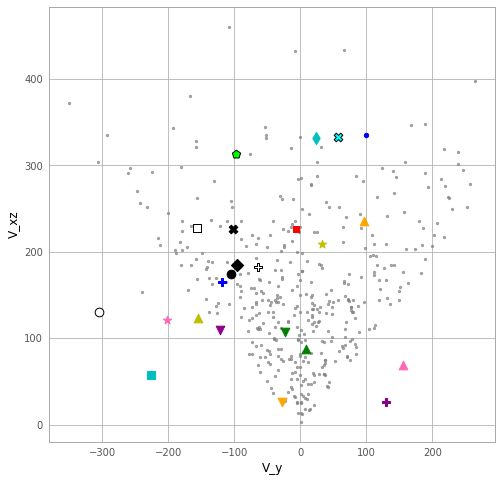

In [7]:
#Toomre: Vy vs Vxz
data = np.genfromtxt("VxVyVz.csv", delimiter=",", names=["v_x","v_y", "v_z"])
ufd = np.genfromtxt("ufdvxvyvz.csv", delimiter=",", names=["v_x","x", "v_z"])

figure, axes = plt.subplots(figsize=(8, 8))

vxz= ((data["v_x"]**2) + (data["v_z"]**2))**(1/2)
ufdvxz= ((data["v_x"]**2) + (data["v_z"]**2))**(1/2)

plt.scatter(data['v_y'], vxz,color='grey',s=5,alpha=0.4)
plt.scatter(data['v_y'][1], vxz[1], color='red',marker='s')
circle=plt.Circle((220, 0), 100, fill=False, color='black',linestyle='dashed',linewidth='3')
plt.scatter(ufd['x'][1], ufdvxz[1], s=size, color='black',marker='X')
plt.scatter(ufd['x'][2],ufdvxz[2], s=size, color='black',marker='D')
plt.scatter(ufd['x'][3], ufdvxz[3],  s=size,color='orange', marker='^')
plt.scatter(ufd['x'][4], ufdvxz[4],  s=size,color='orange', marker='v')
plt.scatter(ufd['x'][5], ufdvxz[5],  s=size,color='white', marker='P', edgecolors='black') #carina i
plt.scatter(ufd['x'][6], ufdvxz[6],  s=size,color='white', edgecolors='black')
plt.scatter(ufd['x'][7], ufdvxz[7],  s=size,color='white',marker='s', edgecolors='black')
plt.scatter(ufd['x'][8], ufdvxz[8],  s=size,color='g',marker='v')
plt.scatter(ufd['x'][9], ufdvxz[9],  s=size,color='green', marker='^')
plt.scatter(ufd['x'][10], ufdvxz[10], s=size, color='black')
plt.scatter(ufd['x'][11], ufdvxz[11], s=size, color='y',marker='^')
plt.scatter(ufd['x'][12], ufdvxz[12], s=size, color='b',marker='.')
plt.scatter(ufd['x'][13], ufdvxz[13], s=size, color='hotpink', marker='*')
plt.scatter(ufd['x'][14], ufdvxz[14], s=size, color='y', marker='*')
plt.scatter(ufd['x'][15], ufdvxz[15], s=size, color='b',marker='P')
plt.scatter(ufd['x'][16], ufdvxz[16], s=size, color='hotpink', marker='^') #sculptor
plt.scatter(ufd['x'][17], ufdvxz[17], s=size, color='c',marker='s')
plt.scatter(ufd['x'][18], ufdvxz[18], s=size, color='c', marker='d')
plt.scatter(ufd['x'][19], ufdvxz[19], s=size, color='darkmagenta', marker='v')
plt.scatter(ufd['x'][20], ufdvxz[20], s=size, color='darkmagenta', marker='P')
plt.scatter(ufd['x'][21], ufdvxz[21], s=size, color='cyan', marker='X',edgecolors='black') #ursa minor
plt.scatter(ufd['x'][22], ufdvxz[22], s=size, color='lime',marker='p',edgecolors='black') #ursa major


#axes.set_aspect(1)
#axes.add_artist(circle)
plt.xlabel('V_y')
plt.ylabel('V_xz')
plt.show()

Text(0.5, 0, 'L_z')

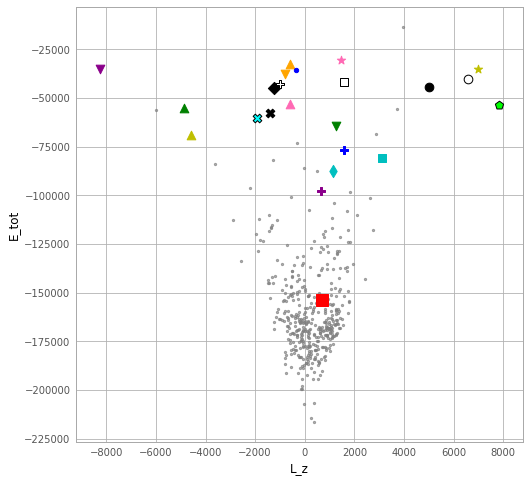

In [8]:
#Etot vs Lz
data = np.genfromtxt("evsl.csv", delimiter=",", names=["a","y","b", "x"])
ufd = np.genfromtxt("ufdevsl.csv", delimiter=",", names=["name","y","a", "x"])
size=75
figure, axes = plt.subplots(figsize=(8, 8))

plt.scatter(data['x'], data['y'],color='grey',s=5,alpha=0.4)
plt.scatter(data['x'][1], data['y'][1], s=150, color='red',marker='s')
plt.scatter(ufd['x'][1], ufd['y'][1], s=size, color='black',marker='X')
plt.scatter(ufd['x'][2], ufd['y'][2], s=size, color='black',marker='D')
plt.scatter(ufd['x'][3], ufd['y'][3],  s=size,color='orange', marker='^')
plt.scatter(ufd['x'][4], ufd['y'][4],  s=size,color='orange', marker='v')
plt.scatter(ufd['x'][5], ufd['y'][5],  s=size,color='white', marker='P', edgecolors='black') #carina i
plt.scatter(ufd['x'][6], ufd['y'][6],  s=size,color='white', edgecolors='black')
plt.scatter(ufd['x'][7], ufd['y'][7],  s=size,color='white',marker='s', edgecolors='black')
plt.scatter(ufd['x'][8], ufd['y'][8],  s=size,color='g',marker='v')
plt.scatter(ufd['x'][9], ufd['y'][9],  s=size,color='green', marker='^')
plt.scatter(ufd['x'][10], ufd['y'][10], s=size, color='black')
plt.scatter(ufd['x'][11], ufd['y'][11], s=size, color='y',marker='^')
plt.scatter(ufd['x'][12], ufd['y'][12], s=size, color='b',marker='.')
plt.scatter(ufd['x'][13], ufd['y'][13], s=size, color='hotpink', marker='*')
plt.scatter(ufd['x'][14], ufd['y'][14], s=size, color='y', marker='*')
plt.scatter(ufd['x'][15], ufd['y'][15], s=size, color='b',marker='P')
plt.scatter(ufd['x'][16], ufd['y'][16], s=size, color='hotpink', marker='^') #sculptor
plt.scatter(ufd['x'][17], ufd['y'][17], s=size, color='c',marker='s')
plt.scatter(ufd['x'][18], ufd['y'][18], s=size, color='c', marker='d')
plt.scatter(ufd['x'][19], ufd['y'][19], s=size, color='darkmagenta', marker='v')
plt.scatter(ufd['x'][20], ufd['y'][20], s=size, color='darkmagenta', marker='P')
plt.scatter(ufd['x'][21], ufd['y'][21], s=size, color='cyan', marker='X',edgecolors='black')
plt.scatter(ufd['x'][22], ufd['y'][22], s=size, color='lime',marker='p',edgecolors='black') #ursa major

plt.ylabel('E_tot')
plt.xlabel('L_z')

Text(0, 0.5, 'Ecc')

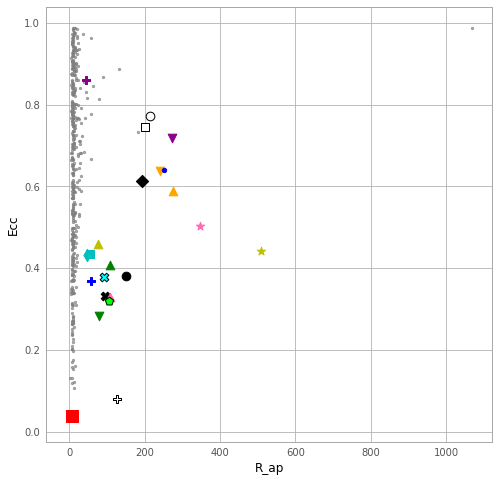

In [9]:
#r_ap vs ecc
data = np.genfromtxt("rapvsecc.csv", delimiter=",", names=["a","x", "y"])
ufd = np.genfromtxt("ufdrapvsecc.csv", delimiter=",", names=["name","x", "y"])
size=75
figure, axes = plt.subplots(figsize=(8, 8))

plt.scatter(data['x'], data['y'],color='grey',s=5,alpha=0.4)
plt.scatter(data['x'][1], data['y'][1], s=150, color='red',marker='s')
plt.scatter(ufd['x'][1], ufd['y'][1], s=size, color='black',marker='X')
plt.scatter(ufd['x'][2], ufd['y'][2], s=size, color='black',marker='D')
plt.scatter(ufd['x'][3], ufd['y'][3],  s=size,color='orange', marker='^')
plt.scatter(ufd['x'][4], ufd['y'][4],  s=size,color='orange', marker='v')
plt.scatter(ufd['x'][5], ufd['y'][5],  s=size,color='white', marker='P', edgecolors='black') #carina i
plt.scatter(ufd['x'][6], ufd['y'][6],  s=size,color='white', edgecolors='black')
plt.scatter(ufd['x'][7], ufd['y'][7],  s=size,color='white',marker='s', edgecolors='black')
plt.scatter(ufd['x'][8], ufd['y'][8],  s=size,color='g',marker='v')
plt.scatter(ufd['x'][9], ufd['y'][9],  s=size,color='green', marker='^')
plt.scatter(ufd['x'][10], ufd['y'][10], s=size, color='black')
plt.scatter(ufd['x'][11], ufd['y'][11], s=size, color='y',marker='^')
plt.scatter(ufd['x'][12], ufd['y'][12], s=size, color='b',marker='.')
plt.scatter(ufd['x'][13], ufd['y'][13], s=size, color='hotpink', marker='*')
plt.scatter(ufd['x'][14], ufd['y'][14], s=size, color='y', marker='*')
plt.scatter(ufd['x'][15], ufd['y'][15], s=size, color='b',marker='P')
plt.scatter(ufd['x'][16], ufd['y'][16], s=size, color='hotpink', marker='^') #sculptor
plt.scatter(ufd['x'][17], ufd['y'][17], s=size, color='c',marker='s')
plt.scatter(ufd['x'][18], ufd['y'][18], s=size, color='c', marker='d')
plt.scatter(ufd['x'][19], ufd['y'][19], s=size, color='darkmagenta', marker='v')
plt.scatter(ufd['x'][20], ufd['y'][20], s=size, color='darkmagenta', marker='P')
plt.scatter(ufd['x'][21], ufd['y'][21], s=size, color='cyan', marker='X',edgecolors='black')
plt.scatter(ufd['x'][22], ufd['y'][22], s=size, color='lime',marker='p',edgecolors='black') #ursa major

plt.xlabel('R_ap')
plt.ylabel('Ecc')

In [10]:
#Vz and Vphi
data = np.genfromtxt("toomre_vz_vphi.csv", delimiter=",", names=["name","v_z", "v_phi"])

figure, axes = plt.subplots(figsize=(8, 8))

vperp= ((10.90586202**2) + (-226.6038724)**2)**(1/2)

plt.scatter(data['v_phi'], data['v_z'],color='grey',alpha=0.65)
plt.scatter(data['v_phi'][1], vperp, color='red',marker='s')
circle=plt.Circle((220, 0), 100, fill=False, color='black',linestyle='dashed',linewidth='3')

axes.set_aspect(1)
axes.add_artist(circle)
plt.xlabel('V_phi')
plt.ylabel('V_z')
plt.show()

OSError: toomre_vz_vphi.csv not found.

In [11]:
#Vx, Vy, and Vphi
data = np.genfromtxt("toomre_vxvyvphi.csv", delimiter=",", names=["name","v_x","v_y", "v_phi"])

figure, axes = plt.subplots(figsize=(8, 8))

vperp= ((data["v_x"]**2) + (data["v_y"]**2))**(1/2)

plt.scatter(data['v_phi'], vperp,color='grey',alpha=0.65)
plt.scatter(data['v_phi'][1], vperp[1], color='red',marker='s')
circle=plt.Circle((220, 0), 100, fill=False, color='black',linestyle='dashed',linewidth='3')
plt.text(250, 450, 'Vperp= sqrt(Vx^2 + Vy^2)', horizontalalignment='left', verticalalignment='top')

axes.set_aspect(1)
axes.add_artist(circle)
plt.xlabel('V_phi')
plt.ylabel('V_perp')
plt.show()

OSError: toomre_vxvyvphi.csv not found.

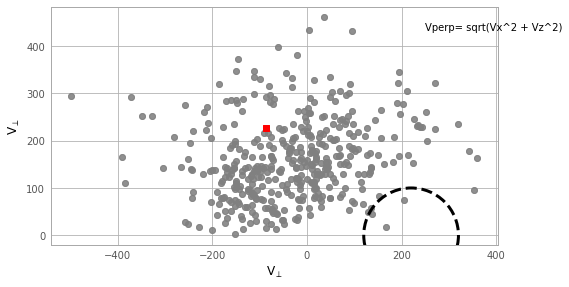

In [12]:
#Vx, Vy, and Vphi
data = np.genfromtxt("toomre_vxvzvphi.csv", delimiter=",", names=["name","v_x","v_z", "v_phi"])

figure, axes = plt.subplots(figsize=(8, 8))

vperp= ((data["v_x"]**2) + (data["v_z"]**2))**(1/2)

plt.scatter(data['v_phi'], vperp,color='grey',alpha=0.65)
plt.scatter(data['v_phi'][1], vperp[1], color='red',marker='s')
circle=plt.Circle((220, 0), 100, fill=False, color='black',linestyle='dashed',linewidth='3')
plt.text(250, 450, 'Vperp= sqrt(Vx^2 + Vz^2)', horizontalalignment='left', verticalalignment='top')

axes.set_aspect(1)
axes.add_artist(circle)
plt.xlabel(r"V$_{\perp}$")
plt.ylabel(r"V$_{\perp}$")
plt.show()

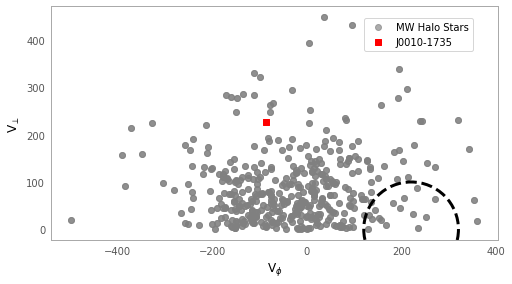

In [13]:
#adpoted in final work
data = np.genfromtxt("toomre_vxvzvphi.csv", delimiter=",", names=["name","v_x","v_z", "v_phi"])

figure, axes = plt.subplots(figsize=(8, 8))

vperp=  (data["v_z"]**2)**(1/2)

plt.scatter(data['v_phi'], vperp,color='grey',alpha=0.65,label= 'MW Halo Stars')
plt.scatter(data['v_phi'][1], vperp[1], color='red',marker='s', label='J0010-1735')
circle=plt.Circle((220, 0), 100, fill=False, color='black',linestyle='dashed',linewidth='3')
#plt.text(250, 450, 'Vperp= abs(Vz)', horizontalalignment='left', verticalalignment='top')
plt.legend(bbox_to_anchor=(0.70, 0.95), loc='upper left', borderaxespad=0.)
axes.set_aspect(1)
axes.add_artist(circle)
plt.grid(b=None)
plt.xlabel(r"V$_{\phi}$")
plt.ylabel(r"V$_{\perp}$")
plt.savefig('toomrediagramupdated.png', dpi=300, bbox_inches='tight')
plt.show()

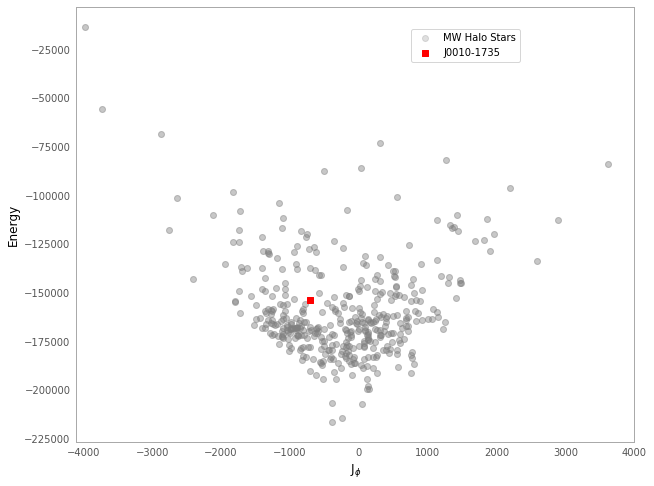

In [14]:
#Action Diagram (figure 8 in https://arxiv.org/pdf/2012.13808.pdf)
data1 = np.genfromtxt("jphi_energy.csv", delimiter=",", names=["name","j_phi","energy"])
figure, axes = plt.subplots(figsize=(10, 8))

plt.scatter(data1['j_phi'], data1['energy'],color='grey',alpha=0.25,label='MW Halo Stars')
plt.scatter(data1['j_phi'][1], data1['energy'][1], color='red',marker='s',label='J0010-1735')
plt.legend(bbox_to_anchor=(0.60, 0.95), loc='upper left', borderaxespad=0.)
plt.xlim(-4100,4000)
plt.grid(b=None)
plt.xlabel(r"J$_{\phi}$")
plt.ylabel('Energy')
plt.savefig('actiondiagramupdated.png', dpi=250)

Car II Jphi is -6592.998812 ,E is -40.12663704


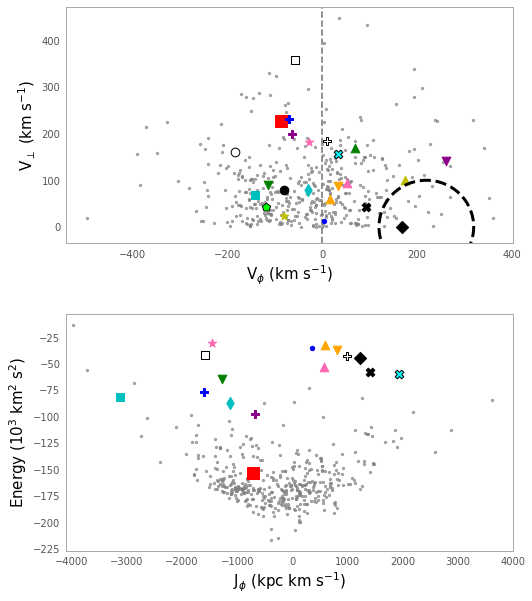

In [31]:
fig, axs = plt.subplots(2, sharex=False, sharey=False,figsize=(8,10),gridspec_kw={'hspace': 0.3, 'height_ratios': [1,1]})
size=75
axs[0].scatter(data['v_phi'], vperp,color='grey',alpha=0.4,s=5,label= 'MW Halo Stars')
axs[0].scatter(data['v_phi'][1], vperp[1], color='red',marker='s', s=150, label='J0010-1735')
circle=plt.Circle((220, 0), 100, fill=False, color='black',linestyle='dashed',linewidth='3')
#plt.text(250, 450, 'Vperp= abs(Vz)', horizontalalignment='left', verticalalignment='top')
#axs[0].legend(bbox_to_anchor=(0.70, 0.95), loc='upper left', borderaxespad=0.)
#axs[0].set_aspect(1)
ufd = np.genfromtxt("ufd_vxvzvphi.csv", delimiter=",", names=["name","v_x","v_z", "x"])
ufdvxz= (ufd["v_z"]**2)**(1/2)
axs[0].scatter(ufd['x'][1], ufdvxz[1], s=size, color='black',marker='X')
axs[0].scatter(ufd['x'][2],ufdvxz[2], s=size, color='black',marker='D')
axs[0].scatter(ufd['x'][3], ufdvxz[3],  s=size,color='orange', marker='^')
axs[0].scatter(ufd['x'][4], ufdvxz[4],  s=size,color='orange', marker='v')
axs[0].scatter(ufd['x'][5], ufdvxz[5],  s=size,color='white', marker='P', edgecolors='black') #carina i
axs[0].scatter(ufd['x'][6], ufdvxz[6],  s=size,color='white', edgecolors='black')
axs[0].scatter(ufd['x'][7], ufdvxz[7],  s=size,color='white',marker='s', edgecolors='black')
axs[0].scatter(ufd['x'][8], ufdvxz[8],  s=size,color='g',marker='v')
axs[0].scatter(ufd['x'][9], ufdvxz[9],  s=size,color='green', marker='^')
axs[0].scatter(ufd['x'][10], ufdvxz[10], s=size, color='black')
axs[0].scatter(ufd['x'][11], ufdvxz[11], s=size, color='y',marker='^')
axs[0].scatter(ufd['x'][12], ufdvxz[12], s=size, color='b',marker='.')
axs[0].scatter(ufd['x'][13], ufdvxz[13], s=size, color='hotpink', marker='*')
axs[0].scatter(ufd['x'][14], ufdvxz[14], s=size, color='y', marker='*')
axs[0].scatter(ufd['x'][15], ufdvxz[15], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][16], ufdvxz[16], s=size, color='hotpink', marker='^') #sculptor
axs[0].scatter(ufd['x'][17], ufdvxz[17], s=size, color='c',marker='s')
axs[0].scatter(ufd['x'][18], ufdvxz[18], s=size, color='c', marker='d')
axs[0].scatter(ufd['x'][19], ufdvxz[19], s=size, color='darkmagenta', marker='v')
axs[0].scatter(ufd['x'][20], ufdvxz[20], s=size, color='darkmagenta', marker='P')
axs[0].scatter(ufd['x'][21], ufdvxz[21], s=size, color='cyan', marker='X',edgecolors='black') #ursa minor
axs[0].scatter(ufd['x'][22], ufdvxz[22], s=size, color='lime',marker='p',edgecolors='black') #ursa major
axs[0].axvline(x=0,color='grey', linestyle='--',zorder=-1)
axs[0].add_artist(circle)
axs[0].grid(b=None)
axs[0].set_xlabel(r"V$_{\phi}$ (km s$^{-1}$)",fontsize=15)
axs[0].set_ylabel(r"V$_{\perp}$ (km s$^{-1}$)",fontsize=15)

energy=data1['energy']/1000
axs[1].scatter(data1['j_phi'], energy,color='grey',alpha=0.4,s=5,label='MW Halo Stars')
axs[1].scatter(data1['j_phi'][1], energy[1], color='red',s=150,marker='s',label='J0010-1735')
ufd = np.genfromtxt("ufd_jphienergy.csv", delimiter=",", names=["name","x","y"])
ufdvxz= ufd["y"]/1000
axs[1].scatter(ufd['x'][1], ufdvxz[1], s=size, color='black',marker='X')
axs[1].scatter(ufd['x'][2],ufdvxz[2], s=size, color='black',marker='D')
axs[1].scatter(ufd['x'][3], ufdvxz[3],  s=size,color='orange', marker='^')
axs[1].scatter(ufd['x'][4], ufdvxz[4],  s=size,color='orange', marker='v')
axs[1].scatter(ufd['x'][5], ufdvxz[5],  s=size,color='white', marker='P', edgecolors='black') #carina i
axs[1].scatter(ufd['x'][6], ufdvxz[6],  s=size,color='white', edgecolors='black',zorder=3)
print("Car II Jphi is", ufd['x'][6], ",E is", ufdvxz[6])
axs[1].scatter(ufd['x'][7], ufdvxz[7],  s=size,color='white',marker='s', edgecolors='black')
axs[1].scatter(ufd['x'][8], ufdvxz[8],  s=size,color='g',marker='v')
axs[1].scatter(ufd['x'][9], ufdvxz[9],  s=size,color='green', marker='^')
axs[1].scatter(ufd['x'][10], ufdvxz[10], s=size, color='black')
axs[1].scatter(ufd['x'][11], ufdvxz[11], s=size, color='y',marker='^')
axs[1].scatter(ufd['x'][12], ufdvxz[12], s=size, color='b',marker='.')
axs[1].scatter(ufd['x'][13], ufdvxz[13], s=size, color='hotpink', marker='*')
axs[1].scatter(ufd['x'][14], ufdvxz[14], s=size, color='y', marker='*')
axs[1].scatter(ufd['x'][15], ufdvxz[15], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][16], ufdvxz[16], s=size, color='hotpink', marker='^') #sculptor
axs[1].scatter(ufd['x'][17], ufdvxz[17], s=size, color='c',marker='s')
axs[1].scatter(ufd['x'][18], ufdvxz[18], s=size, color='c', marker='d')
axs[1].scatter(ufd['x'][19], ufdvxz[19], s=size, color='darkmagenta', marker='v')
axs[1].scatter(ufd['x'][20], ufdvxz[20], s=size, color='darkmagenta', marker='P')
axs[1].scatter(ufd['x'][21], ufdvxz[21], s=size, color='cyan', marker='X',edgecolors='black') #ursa minor
axs[1].scatter(ufd['x'][22], ufdvxz[22], s=size, color='lime',marker='p',edgecolors='black') #ursa major
axs[1].set_xlim(-4100,4000)
axs[1].grid(b=None)
axs[1].set_xlabel(r"J$_{\phi}$ (kpc km s$^{-1}$)",fontsize=15)
axs[1].set_ylabel(r"Energy ($10^{3}$ km$^{2}$ s$^{2}$)",fontsize=15)
axs[1].ticklabel_format(useOffset=True)

#data = np.genfromtxt("eccrperi.csv", delimiter=",", names=["a","y", "x"])
#ufd = np.genfromtxt("ufdeccrperi.csv", delimiter=",", names=["name","y", "x"])
#axs[2].scatter(data['x'], data['y'],color='grey',s=5,alpha=0.4)
#axs[2].scatter(data['x'][1], data['y'][1], s=150, color='red',marker='s')
#axs[2].scatter(ufd['x'][1], ufd['y'][1], s=size, color='black',marker='X')
#axs[2].scatter(ufd['x'][2], ufd['y'][2], s=size, color='black',marker='D')
#axs[2].scatter(ufd['x'][3], ufd['y'][3],  s=size,color='orange', marker='^')
#axs[2].scatter(ufd['x'][4], ufd['y'][4],  s=size,color='orange', marker='v')
#axs[2].scatter(ufd['x'][5], ufd['y'][5],  s=size,color='white', marker='P', edgecolors='black') #carina i
#axs[2].scatter(ufd['x'][6], ufd['y'][6],  s=size,color='white', edgecolors='black')
#axs[2].scatter(ufd['x'][7], ufd['y'][7],  s=size,color='white',marker='s', edgecolors='black')
#axs[2].scatter(ufd['x'][8], ufd['y'][8],  s=size,color='g',marker='v')
#axs[2].scatter(ufd['x'][9], ufd['y'][9],  s=size,color='green', marker='^')
#axs[2].scatter(ufd['x'][10], ufd['y'][10], s=size, color='black')
#axs[2].scatter(ufd['x'][11], ufd['y'][11], s=size, color='y',marker='^')
#axs[2].scatter(ufd['x'][12], ufd['y'][12], s=size, color='b',marker='.')
#axs[2].scatter(ufd['x'][13], ufd['y'][13], s=size, color='hotpink', marker='*')
#axs[2].scatter(ufd['x'][14], ufd['y'][14], s=size, color='y', marker='*')
#axs[2].scatter(ufd['x'][15], ufd['y'][15], s=size, color='b',marker='P')
#axs[2].scatter(ufd['x'][16], ufd['y'][16], s=size, color='hotpink', marker='^') #sculptor
#axs[2].scatter(ufd['x'][17], ufd['y'][17], s=size, color='c',marker='s')
#axs[2].scatter(ufd['x'][18], ufd['y'][18], s=size, color='c', marker='d')
#axs[2].scatter(ufd['x'][19], ufd['y'][19], s=size, color='darkmagenta', marker='v')
#axs[2].scatter(ufd['x'][20], ufd['y'][20], s=size, color='darkmagenta', marker='P')
#axs[2].scatter(ufd['x'][21], ufd['y'][21], s=size, color='cyan', marker='X',edgecolors='black')
#axs[2].scatter(ufd['x'][22], ufd['y'][22], s=size, color='lime',marker='p',edgecolors='black') #ursa major
#axs[2].set_xlim(-10,150)
#axs[2].grid(b=None)
#axs[2].set_xlabel(r"R$_{peri}$",fontsize=17)
#axs[2].set_ylabel(r"Ecc",fontsize=17)
#axs[2].ticklabel_format(useOffset=True)

fig.savefig('actiontoomresubplot.png', dpi=300,bbox_inches='tight')

Text(0, 0.5, '(Jz-Jr) / Jtot')

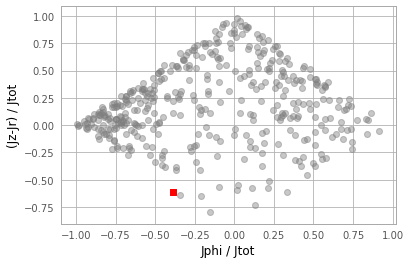

In [19]:
#Action Diagram (figure 7 in https://arxiv.org/pdf/2012.13808.pdf)
data = np.genfromtxt("jr_jz.csv", delimiter=",", names=["name","j_r","j_z"])


Jtot= data['j_r'] + data['j_z'] + ((data1['j_phi']**2)**(1/2))
yaxis= (data['j_z']-data['j_r']) / Jtot
xaxis= data1['j_phi']/ Jtot

plt.scatter(xaxis, yaxis,color='grey',alpha=0.25)
plt.scatter(xaxis[1], yaxis[1], color='red',marker='s')
plt.xlabel('Jphi / Jtot')
plt.ylabel('(Jz-Jr) / Jtot')
#plt.ylim(-100,2000)

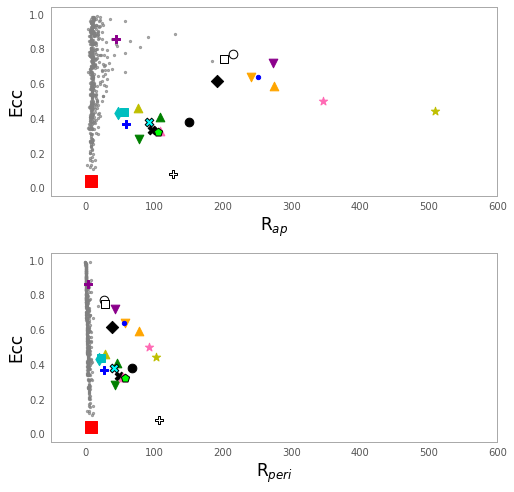

In [31]:
fig, axs = plt.subplots(2, sharex=False, sharey=False,figsize=(8,8),gridspec_kw={'hspace': 0.3, 'height_ratios': [1, 1]})

data = np.genfromtxt("rapvsecc.csv", delimiter=",", names=["a","x", "y"])
ufd = np.genfromtxt("ufdrapvsecc.csv", delimiter=",", names=["name","x", "y"])
size=75
axs[0].scatter(data['x'], data['y'],color='grey',s=5,alpha=0.4)
axs[0].scatter(data['x'][1], data['y'][1], s=150, color='red',marker='s')
axs[0].scatter(ufd['x'][1], ufd['y'][1], s=size, color='black',marker='X')
axs[0].scatter(ufd['x'][2], ufd['y'][2], s=size, color='black',marker='D')
axs[0].scatter(ufd['x'][3], ufd['y'][3],  s=size,color='orange', marker='^')
axs[0].scatter(ufd['x'][4], ufd['y'][4],  s=size,color='orange', marker='v')
axs[0].scatter(ufd['x'][5], ufd['y'][5],  s=size,color='white', marker='P', edgecolors='black') #carina i
axs[0].scatter(ufd['x'][6], ufd['y'][6],  s=size,color='white', edgecolors='black')
axs[0].scatter(ufd['x'][7], ufd['y'][7],  s=size,color='white',marker='s', edgecolors='black')
axs[0].scatter(ufd['x'][8], ufd['y'][8],  s=size,color='g',marker='v')
axs[0].scatter(ufd['x'][9], ufd['y'][9],  s=size,color='green', marker='^')
axs[0].scatter(ufd['x'][10], ufd['y'][10], s=size, color='black')
axs[0].scatter(ufd['x'][11], ufd['y'][11], s=size, color='y',marker='^')
axs[0].scatter(ufd['x'][12], ufd['y'][12], s=size, color='b',marker='.')
axs[0].scatter(ufd['x'][13], ufd['y'][13], s=size, color='hotpink', marker='*')
axs[0].scatter(ufd['x'][14], ufd['y'][14], s=size, color='y', marker='*')
axs[0].scatter(ufd['x'][15], ufd['y'][15], s=size, color='b',marker='P')
axs[0].scatter(ufd['x'][16], ufd['y'][16], s=size, color='hotpink', marker='^') #sculptor
axs[0].scatter(ufd['x'][17], ufd['y'][17], s=size, color='c',marker='s')
axs[0].scatter(ufd['x'][18], ufd['y'][18], s=size, color='c', marker='d')
axs[0].scatter(ufd['x'][19], ufd['y'][19], s=size, color='darkmagenta', marker='v')
axs[0].scatter(ufd['x'][20], ufd['y'][20], s=size, color='darkmagenta', marker='P')
axs[0].scatter(ufd['x'][21], ufd['y'][21], s=size, color='cyan', marker='X',edgecolors='black')
axs[0].scatter(ufd['x'][22], ufd['y'][22], s=size, color='lime',marker='p',edgecolors='black') #ursa major
axs[0].set_xlim(-50,600)
axs[0].grid(b=None)
axs[0].set_xlabel(r"R$_{ap}$",fontsize=17)
axs[0].set_ylabel(r"Ecc",fontsize=17)
axs[0].ticklabel_format(useOffset=True)

data = np.genfromtxt("eccrperi.csv", delimiter=",", names=["a","y", "x"])
ufd = np.genfromtxt("ufdeccrperi.csv", delimiter=",", names=["name","y", "x"])
size=75
axs[1].scatter(data['x'], data['y'],color='grey',s=5,alpha=0.4)
axs[1].scatter(data['x'][1], data['y'][1], s=150, color='red',marker='s')
axs[1].scatter(ufd['x'][1], ufd['y'][1], s=size, color='black',marker='X')
axs[1].scatter(ufd['x'][2], ufd['y'][2], s=size, color='black',marker='D')
axs[1].scatter(ufd['x'][3], ufd['y'][3],  s=size,color='orange', marker='^')
axs[1].scatter(ufd['x'][4], ufd['y'][4],  s=size,color='orange', marker='v')
axs[1].scatter(ufd['x'][5], ufd['y'][5],  s=size,color='white', marker='P', edgecolors='black') #carina i
axs[1].scatter(ufd['x'][6], ufd['y'][6],  s=size,color='white', edgecolors='black')
axs[1].scatter(ufd['x'][7], ufd['y'][7],  s=size,color='white',marker='s', edgecolors='black')
axs[1].scatter(ufd['x'][8], ufd['y'][8],  s=size,color='g',marker='v')
axs[1].scatter(ufd['x'][9], ufd['y'][9],  s=size,color='green', marker='^')
axs[1].scatter(ufd['x'][10], ufd['y'][10], s=size, color='black')
axs[1].scatter(ufd['x'][11], ufd['y'][11], s=size, color='y',marker='^')
axs[1].scatter(ufd['x'][12], ufd['y'][12], s=size, color='b',marker='.')
axs[1].scatter(ufd['x'][13], ufd['y'][13], s=size, color='hotpink', marker='*')
axs[1].scatter(ufd['x'][14], ufd['y'][14], s=size, color='y', marker='*')
axs[1].scatter(ufd['x'][15], ufd['y'][15], s=size, color='b',marker='P')
axs[1].scatter(ufd['x'][16], ufd['y'][16], s=size, color='hotpink', marker='^') #sculptor
axs[1].scatter(ufd['x'][17], ufd['y'][17], s=size, color='c',marker='s')
axs[1].scatter(ufd['x'][18], ufd['y'][18], s=size, color='c', marker='d')
axs[1].scatter(ufd['x'][19], ufd['y'][19], s=size, color='darkmagenta', marker='v')
axs[1].scatter(ufd['x'][20], ufd['y'][20], s=size, color='darkmagenta', marker='P')
axs[1].scatter(ufd['x'][21], ufd['y'][21], s=size, color='cyan', marker='X',edgecolors='black')
axs[1].scatter(ufd['x'][22], ufd['y'][22], s=size, color='lime',marker='p',edgecolors='black') #ursa major
axs[1].set_xlim(-50,600)
axs[1].grid(b=None)
axs[1].set_xlabel(r"R$_{peri}$",fontsize=17)
axs[1].set_ylabel(r"Ecc",fontsize=17)
axs[1].ticklabel_format(useOffset=True)